# Part 1: Volumetric Understanding of the Data

This notebook will serve to format gain an understanding of the tweet data (cleaned in the `data_cleaning.ipynb` notebook) in general and from a volumetric perspective.

### General setup

In [28]:
# Import packages
import pandas as pd 
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
# Set theme for creating visualizations

# Set text sizes
title_size = 22
label_size = 16
tick_text_size = 12

# Set background and text colors
background_color = '#F7F7F4'
text_color = 'black'

# Set options of colors for use in plotting
color1 = "#9FB881"  # (dark green)
color2 = "#B89A81"  # (brown)
color3 = "#2E4057"  # (charcoal)
color4 = "#cfbaa9"  # (light brown)
color5 = "#806248"  # (dark brown)
color6 = "#B8B681"  # (dark tan)
color7 = "#D19C1D"  # (gold)
color8 = "#969966"  # (army green)

# Set theme for creating visualizations
plt.rcParams.update({
                     'axes.edgecolor': 'white',
                     'axes.facecolor': background_color,
                     'axes.grid': True,
                     'axes.labelcolor': text_color,
                     'axes.titlesize': title_size,
                     'axes.labelsize': label_size,
                     'figure.facecolor': background_color,
                     'text.color': text_color,
                     'xtick.color': text_color,
                     'xtick.labelsize' : tick_text_size,
                     'ytick.color': text_color,
                     'ytick.labelsize' : tick_text_size,
                     })

### Prepare data

In [30]:
# Read in data 
data = pd.read_csv('./cleaned_tweet_data.csv')

# View first few rows of data
data.head(2)

,created_at,text,hashtags,user_mention_ids,user_mention_screen_names,retweet_count,favorite_count,user_id,user_screen_name,user_name,user_location,user_friends_count,user_followers_count,user_favourites_count,user_verfied,user_statuses_count,topic,text_clean,text_clean_noStop,text_clean_noStop_noSearch
0,2022-10-18 00:00:00,Sharp words on guns in Shane Hazel to Stacey A...,['gagovdebate'],[],[],5,24,25282846,SimonesNews,Simone Sebastian,Washington DC,3110,5830,1445,True,4400,abrams,sharp words on guns in shane hazel to stacey ...,sharp words guns shane hazel stacey abrams kee...,sharp words guns shane hazel keep going back g...
1,2022-10-18 00:00:01,Stacey Abrams won tonight. She kept to the fac...,[],[],[],0,6,1312393604439183361,nching0,Thee Lost Edges of Candace 🪥,"34.2073° N, 84.1402° W",922,752,101529,False,61963,abrams,stacey abrams won tonight she kept to the fa...,stacey abrams tonight kept facts answered ques...,tonight kept facts answered questions math poi...


### Exploring the Data

1. Get count of tweets overall

In [31]:
print("There are {} Tweets in our dataset".format(len(data)))

There are 51336 Tweets in our dataset


2. Understand distribution of data by topic (Abrams, Kemp, Election)

In [32]:
# Group by search term topic (combo of kemp, abrams, or election)
topic_counts = pd.DataFrame(data.groupby(['topic'])['topic'].count())
topic_counts.columns = ['counts']
topic_counts.reset_index(inplace=True)

# Get proportions of data represented by each search topic 
topic_counts['percent'] = round(topic_counts['counts'] / sum(topic_counts['counts']) * 100,1)

# View results
topic_counts

,topic,counts,percent
0,abrams,32299,62.9
1,"abrams, election",576,1.1
2,"abrams, kemp",2228,4.3
3,"abrams, kemp, election",780,1.5
4,election,3726,7.3
5,kemp,10518,20.5
6,"kemp, election",1209,2.4


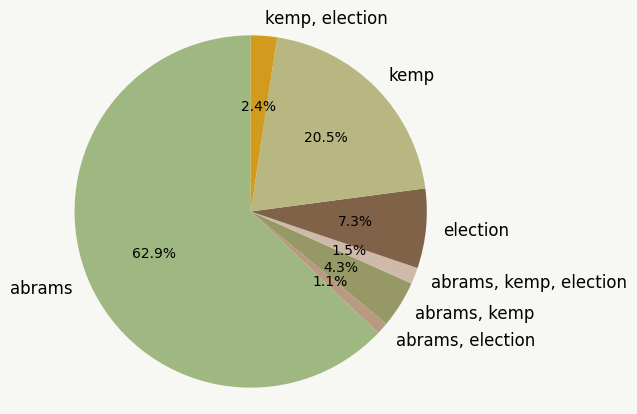

In [33]:
# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.pie(topic_counts['percent'], 
       labels=topic_counts['topic'],
       autopct='%1.1f%%',
       shadow=False, 
       startangle=90,
       colors=[color1, color2, color8, color4, color5, color6, color7])
ax.axis('equal')
plt.savefig('../Visualizations/vol_topic_dist_pie', bbox_inches='tight')
plt.show()

In [34]:
### Get the counts of all tweets of each specific category (Abrams, Kemp, Election)

# Explode topics into a single row for each
topic_counts['topic'] = topic_counts['topic'].apply(lambda x: x.replace(',', ''))
topic_counts['topic'] = topic_counts['topic'].apply(lambda x: x.split())
topic_counts = topic_counts.explode('topic')
topic_counts = topic_counts[['topic', 'counts']]

# Group by search term topic (kemp, abrams, or election)
topic_counts = topic_counts.groupby(['topic']).sum(['counts']).sort_values(['counts'], ascending=False)
topic_counts.reset_index(inplace=True)

# View results
topic_counts

,topic,counts
0,abrams,35883
1,kemp,14735
2,election,6291


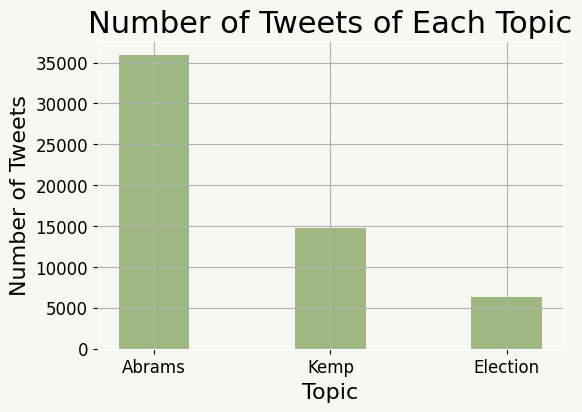

In [35]:
# Plot the counts of tweets of each topic
fig = plt.figure(figsize = (6, 4))
plt.bar(['Abrams', 'Kemp', 'Election'], topic_counts['counts'], color=color1, width = 0.4)
plt.title('Number of Tweets of Each Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Tweets')
plt.savefig('../Visualizations/vol_topic_dist_bar', bbox_inches='tight')
plt.show()

keyword associations to determine tweet mentions 

- keywords associated with each candidate 
- bin tweet into "mentions" category such that each tweet mentions 
    - candidate 1
    - candidate 2 
    - both candidates 
    - the election in general 

### Time Series Analysis

- mentions of each candidate over time
(rate of increase or decrease of mentions over time) 

In [36]:
# Subset the data
election_ts_df = data[['created_at', 'topic']]

# Get day from date
election_ts_df['day'] = pd.to_datetime(election_ts_df['created_at']).dt.floor('d')

# Group data by day
grouped_df = election_ts_df.groupby(['day', 'topic'], as_index=False).size()

/var/folders/tj/b8x6sk5104794yn7q0kw1wbm0000gn/T/ipykernel_25249/769398058.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election_ts_df['day'] = pd.to_datetime(election_ts_df['created_at']).dt.floor('d')


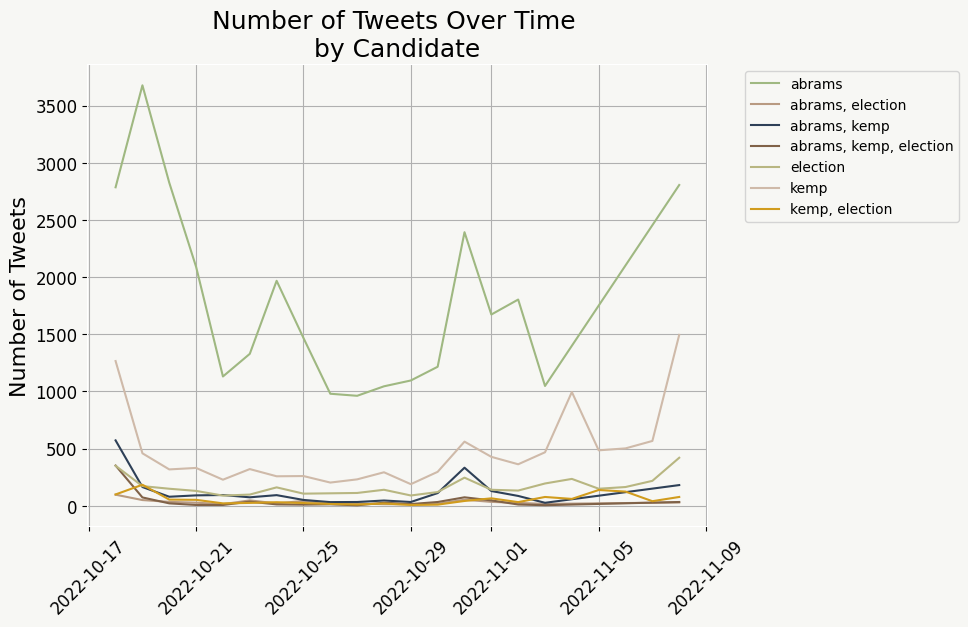

In [37]:
# Plot the number of tweets of each topic over time
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(x="day", y="size", hue="topic", data=grouped_df, palette = [color1, color2, color3, color5, color6, color4, color7])
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Number of Tweets', size = 16)
plt.title('Number of Tweets Over Time \nby Candidate', size = 18)
plt.legend(bbox_to_anchor = (1.05,1))
plt.savefig('../Visualizations/vol_topic_dist_timeseries', bbox_inches='tight')

In [38]:
# Get the total number of tweets for each candidate across all combination of topics
election_ts_df['topic_split'] = election_ts_df['topic'].str.split(',')
exploded_election_ts_df = election_ts_df.explode('topic_split')
exploded_election_ts_df['topic_split'] = exploded_election_ts_df['topic_split'].str.strip()

# Filter out tweets only about the election in general
exploded_election_ts_df = exploded_election_ts_df[exploded_election_ts_df['topic_split'] != 'election']

# Group the data by day
exploded_grouped_df = exploded_election_ts_df.groupby(['day', 'topic_split'], as_index=False).size()

# Reformat date
exploded_grouped_df['date'] = exploded_grouped_df['day'].apply(lambda x: 'Oct '+str(x.day) if x.month==10 else 'Nov '+str(x.day))

/var/folders/tj/b8x6sk5104794yn7q0kw1wbm0000gn/T/ipykernel_25249/2437131972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election_ts_df['topic_split'] = election_ts_df['topic'].str.split(',')


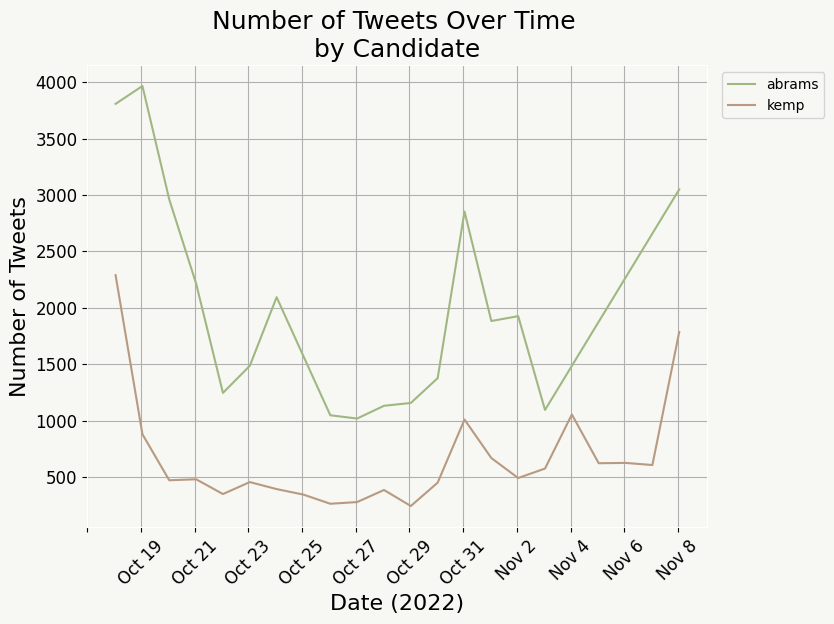

In [39]:
# Plot the total number of tweets of about each candidate over time
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(x="date", y="size", hue="topic_split", data=exploded_grouped_df, palette = [color1, color2])
plt.xticks(rotation=45)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 2.0))
plt.xlabel('Date (2022)')
plt.ylabel('Number of Tweets', size = 16)
plt.title('Number of Tweets Over Time \nby Candidate', size = 18)
plt.legend(bbox_to_anchor = (1.2,1))
plt.savefig('../Visualizations/vol_topic_dist_timeseries_explode', bbox_inches='tight')

In [40]:
# Get total count of tweets about each candidate
exploded_election_ts_df.groupby('topic_split').size()

topic_split
abrams    35883
kemp      14735
dtype: int64

In [41]:
# election_candidate_df = election_ts_df[election_ts_df['topic'].isin(['kemp, election', 'abrams, election'])]
# election_candidate_df = election_candidate_df.groupby(['day', 'topic'], as_index=False).size()
# pd.DataFrame(election_candidate_df.pivot(index="day", columns="topic", values="size")).plot()